<a href="https://colab.research.google.com/github/Ifedaniel/-An-Analytical-Study-on-Predicting-Customer-Churn-in-the-Telecommunications-Sector-Machine-Learning/blob/main/A_Machine_Learning_Approach_Using_Data_from_an_Iranian_Telecom_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Analytical Study on Predicting Customer Churn in the Telecommunications Sector: A Machine Learning Approach Using Data from an Iranian Telecom Company.

The aim of this project is to use machine learning to predict customer churn in the telecommunication sector, using data from an Iranian telecom company.

## Data Dictionary

- Anonymous Customer ID
- Call Failures: number of call failures
- Complains: binary (0: No complaint, 1: complaint)
- Subscription Length: total months of subscription
- Charge Amount: Ordinal attribute (0-2: lowest amount,3-4:Low amount, 5-6:moderate amount, 7-8: High amount 9-10: highest amount)
- Seconds of Use: total seconds of calls
- Frequency of use: total number of calls
- Frequency of SMS: total number of text messages
- Distinct Called Numbers: total number of distinct phone calls
- Age Group: ordinal attribute (1: younger age, 2: middle aged, 3: core middle-agged, 4: late middle-aged, 5: older age)
- Tariff Plan: binary (1: Pay as you go, 2: contractual)
- Status: binary (1: active, 2: non-active)
- Churn: binary (1: churn, 0: non-churn) - Class label
- Customer Value: The calculated value of customer, i.e the amount spent till date in Iranian Rial

In [ ]:
#Importing important librarires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading the dataset
cust_churn_df = pd.read_csv('Customer_Churn.csv')

#previewing the data
cust_churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
#checking the shape of the dataset.

cust_churn_df.shape

(3150, 14)

The dataset contains 3150 rows and 14 columns.

The dataset also contains only numerical values, which we need to preprocess for the data to be suitable for Exploratory Data Analysis (EDA). This issue will be handled while cleaning the data.

## Data Cleaning

### Preprocessing

In [ ]:
#copying the dataset

churn_df= cust_churn_df.copy()

#previewing the copied data
churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


According to the data dictionary, we need to convert of the some of the numerical values to categorical values.

In [ ]:
#Starting with the complains column

#creating a dictionary to be mapped to the data
complains_status = {0:'No complaint', 1:'complaint'}

#mapping it to the df
churn_df['Complains'] = churn_df['Complains'].map(complains_status)

#checking the results
churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No complaint,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,No complaint,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,No complaint,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,No complaint,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,No complaint,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
#performing the mapping for age group

#creating the dictionary
age_group_value = {1:'younger age', 2:'middle aged', 3:'core middle aged',
                  4:'late middle aged', 5:'older age'
}

#mapping it
churn_df['Age Group']= churn_df['Age Group'].map(age_group_value)


#checking
churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No complaint,38,0,4370,71,5,17,core middle aged,1,1,30,197.640,0
1,0,No complaint,39,0,318,5,7,4,middle aged,1,2,25,46.035,0
2,10,No complaint,37,0,2453,60,359,24,core middle aged,1,1,30,1536.520,0
3,10,No complaint,38,0,4198,66,1,35,younger age,1,1,15,240.020,0
4,3,No complaint,38,0,2393,58,2,33,younger age,1,1,15,145.805,0


In [ ]:
#performing the mapping for tariff plan

#creating the dictionary
tariff_value = {1:'pay as you go', 2:'contractual'
}

#mapping it
churn_df['Tariff Plan']= churn_df['Tariff Plan'].map(tariff_value)


#checking
churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No complaint,38,0,4370,71,5,17,core middle aged,pay as you go,1,30,197.640,0
1,0,No complaint,39,0,318,5,7,4,middle aged,pay as you go,2,25,46.035,0
2,10,No complaint,37,0,2453,60,359,24,core middle aged,pay as you go,1,30,1536.520,0
3,10,No complaint,38,0,4198,66,1,35,younger age,pay as you go,1,15,240.020,0
4,3,No complaint,38,0,2393,58,2,33,younger age,pay as you go,1,15,145.805,0


In [ ]:
#performing the mapping for age group

#creating the dictionary
status_value = {1:'active', 2:'non_active'
}

#mapping it
churn_df['Status']= churn_df['Status'].map(status_value)


#checking
churn_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,No complaint,38,0,4370,71,5,17,core middle aged,pay as you go,active,30,197.640,0
1,0,No complaint,39,0,318,5,7,4,middle aged,pay as you go,non_active,25,46.035,0
2,10,No complaint,37,0,2453,60,359,24,core middle aged,pay as you go,active,30,1536.520,0
3,10,No complaint,38,0,4198,66,1,35,younger age,pay as you go,active,15,240.020,0
4,3,No complaint,38,0,2393,58,2,33,younger age,pay as you go,active,15,145.805,0


We have preprocess our data, now let's do some cleaning of the data

In [ ]:
#data info

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   object 
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   object 
 9   Tariff Plan              3150 non-null   object 
 10  Status                   3150 non-null   object 
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(9),

In [ ]:
churn_df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

We have no misssing values in our data

In [ ]:
#checking the datatype
churn_df.dtypes

Call  Failure                int64
Complains                   object
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                   object
Tariff Plan                 object
Status                      object
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

We have the right datatype for rach of the variables.

## Exploratory Data Analysis (EDA).

### Statistical Summary

In [ ]:
#doing a summary stats

churn_df.describe()

,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916,0.157143
std,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433,0.363993
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250,0.000000
50%,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000,0.000000
75%,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750,0.000000
max,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000,1.000000


Looking at the results:
- Call failure: We have an average call failure of 7.6 and the maximum we have is 36
- Subcription lenght: Minimun subcription lenght is 3 weeks, maximum is 47 weeks, while the average is 32.5 weeks
- Seconds of Use: The maximum is 17090 seconds, and the average is 4472 seconds
- Age: The maximum age is 55, while the minimum is 15, and the average age is approximately 31.
- Customer Value: maximum amount spent is 2165 Irain Rial, and the average amount is approximately 471

### Checking the Churn Rate.

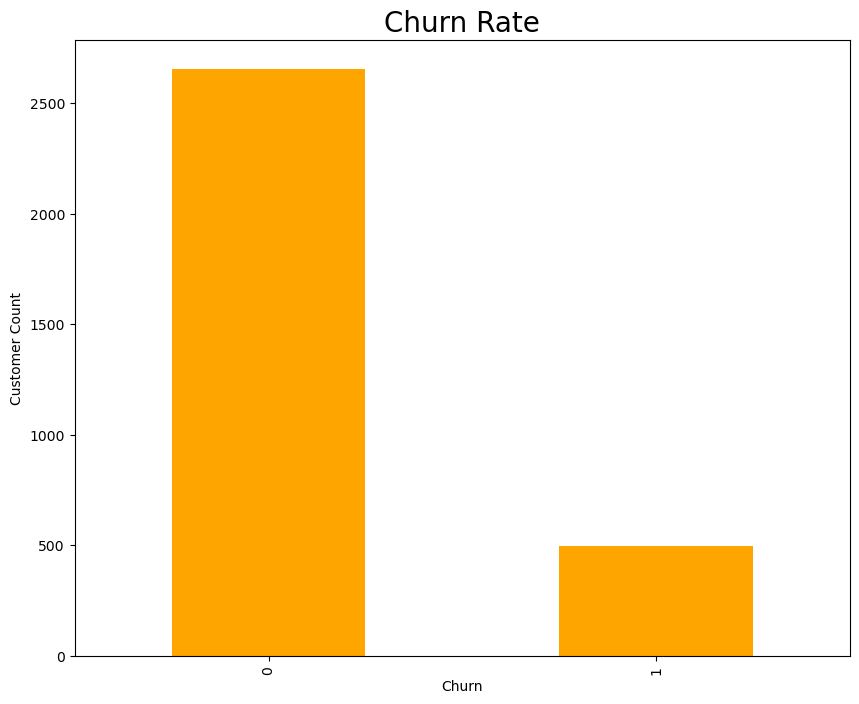

Churn rate is 0.16


In [ ]:
churn_rate = churn_df['Churn'].value_counts()

#plotting the distribution
plt.figure(figsize=(10,8))
churn_rate.plot(kind='bar', color='orange' )
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Rate', size=20)
plt.show()

global_mean = churn_df['Churn'].mean()

print('Churn rate is {}'.format(round(global_mean,2)))

From the result, our churn is 16%, which actually low

### Distribution of Age

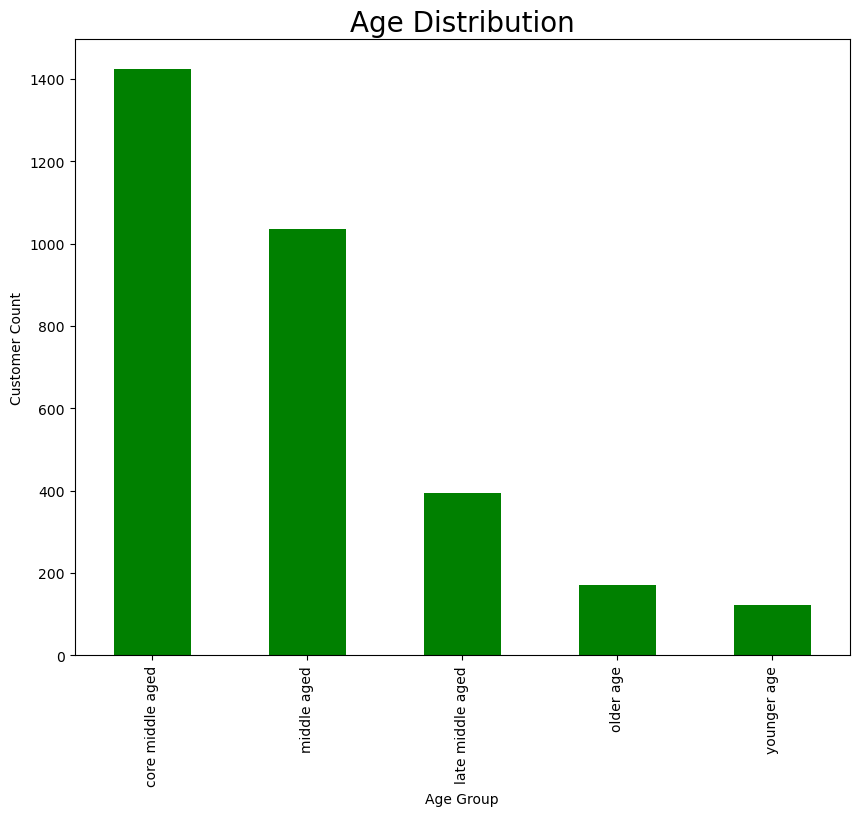

In [ ]:
#getting the count of each age_group
age_dist=churn_df['Age Group'].value_counts()

#plotting the distribution
plt.figure(figsize=(10,8))
age_dist.plot(kind='bar', color='green')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.title('Age Distribution', size=20)
plt.show()

From the visual, we can see that the core middle age are the largest share of customers that we have, and the least share are the younger age as expected.

### Relatioship between Age Group and Customer value

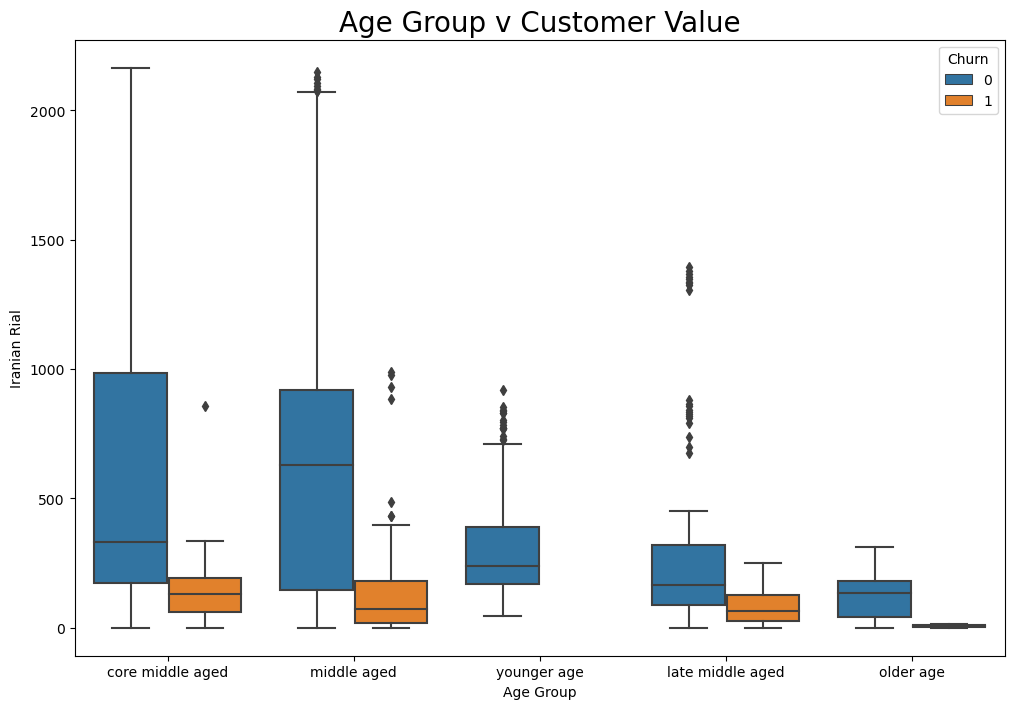

In [ ]:
#Using box plot

plt.figure(figsize=(12,8))

sns.boxplot(x='Age Group', y='Customer Value', hue='Churn', data=churn_df)

plt.title('Age Group v Customer Value', size=20)
plt.xlabel('Age Group')
plt.ylabel('Iranian Rial')
plt.show()

From the visualization, it is evident that, customers that spend less tend to churn, and this is uniform for all the age group.

### Age Group v Second of Use

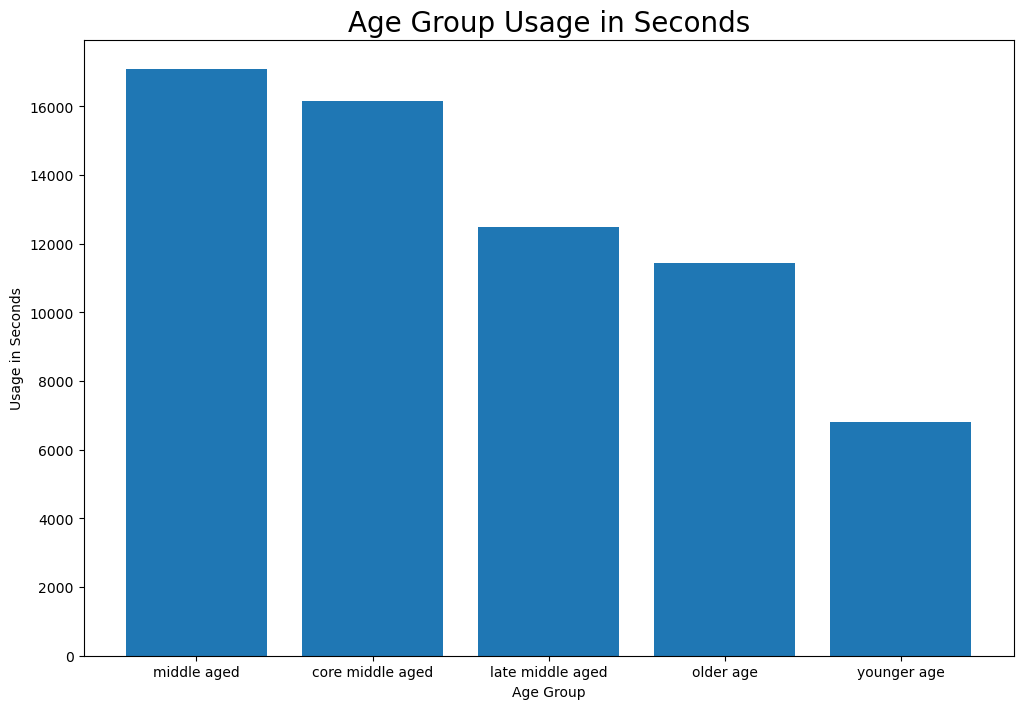

In [ ]:
#sorting the data
ag_v_su = churn_df.sort_values(by=['Seconds of Use'], ascending=False)

#plotting
plt.figure(figsize=(12,8))
plt.bar(ag_v_su['Age Group'], ag_v_su['Seconds of Use'])
plt.xlabel('Age Group')
plt.ylabel('Usage in Seconds')
plt.title('Age Group Usage in Seconds', size=20)
plt.show()

From the visualization, it is obvious that middle aged spends more on the network, than the any other group even though they aren't the one with the largest share of the total customers we have.

### Subscription Length v Churn

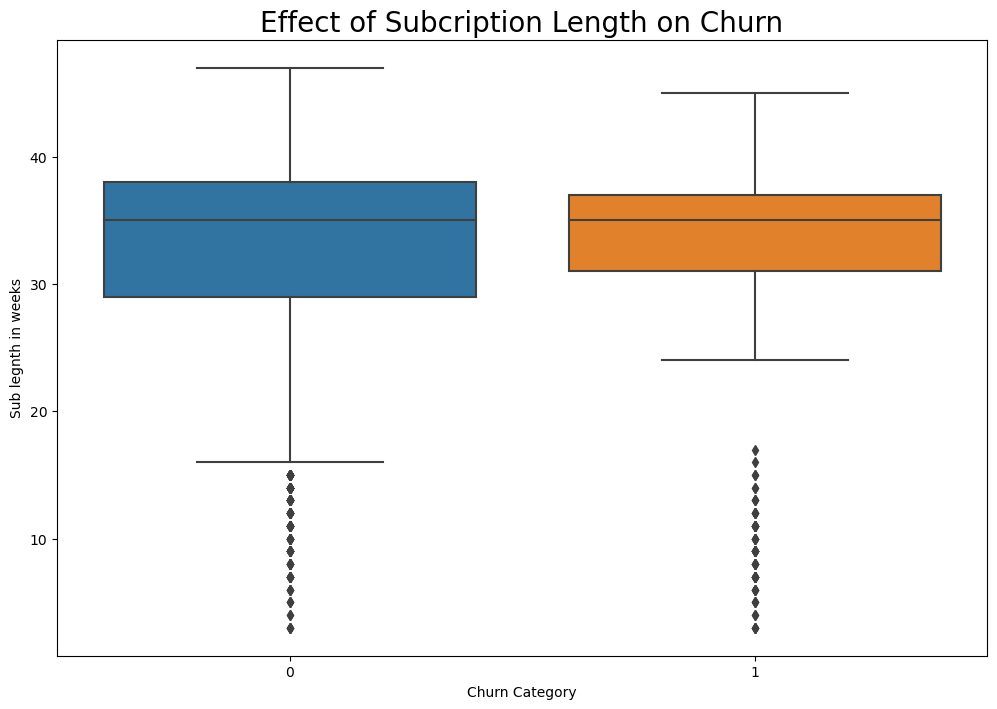

In [ ]:
#Using box plot

plt.figure(figsize=(12,8))

sns.boxplot(x='Churn', y='Subscription  Length', data=churn_df)

plt.title('Effect of Subcription Length on Churn', size=20)
plt.xlabel('Churn Category')
plt.ylabel('Sub legnth in weeks')
plt.show()

Look at the visualization, it is obvious that subcription length as no effects on weather a customer will churn or not, as customers that churned and the ones that didn't, have the same distribution

### Relation between Subcription Length vs Seconds of Use

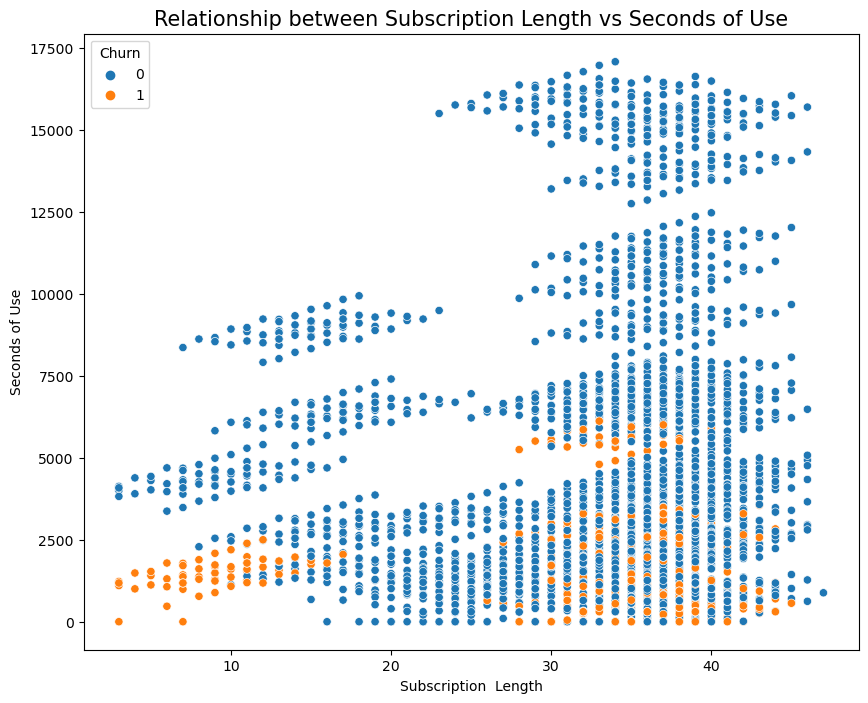

In [ ]:

plt.figure(figsize=(10,8))
sns.scatterplot(x='Subscription  Length', hue='Churn', y='Seconds of Use', data=churn_df)
plt.title('Relationship between Subscription Length vs Seconds of Use', size=15)
plt.show()

Looking at the visual, We can see that the higher the subscription length, the more the seconds of use, also we can see that there is no clear indication that subcription lenght has any effects on churning, but for the seconds of use, the more seconds a customer uses, the less likely they are to churn.

### Effects on Complaints on Churn

In [ ]:
#grouping the needed variables
df=churn_df.groupby(['Complains','Churn']).size()

#converting it to dataframe
df = df.unstack().reset_index()

df



Churn,Complains,0,1
0,No complaint,2614,295
1,complaint,41,200


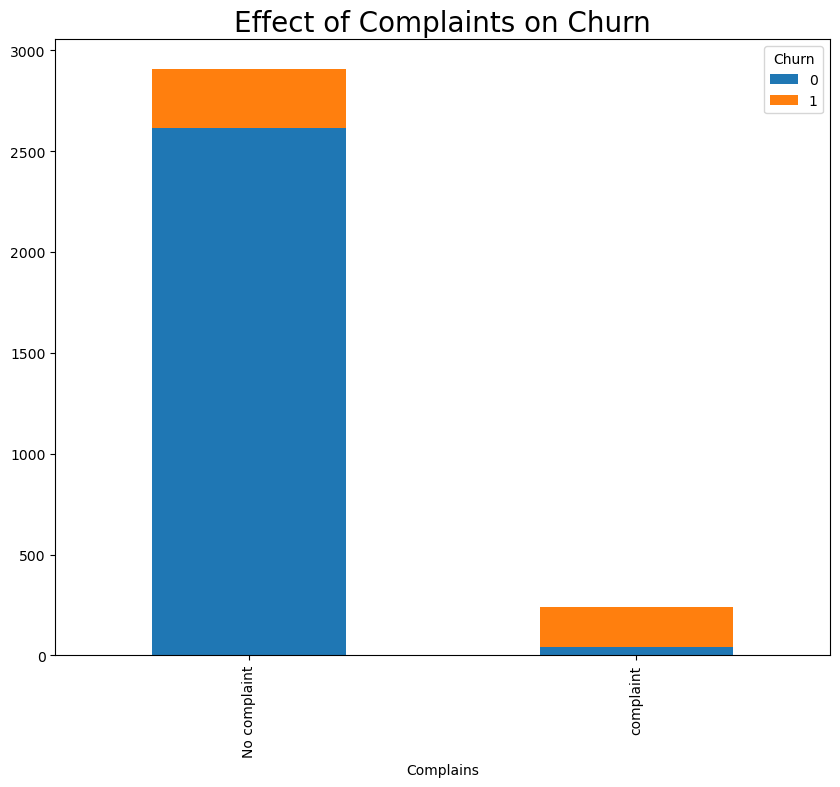

In [ ]:
#plotting
df.plot(kind='bar', x='Complains',stacked=True, figsize=(10,8))
plt.title('Effect of Complaints on Churn', size=20)

plt.show()

From the visualization, we have less people that has lodged complaints, but it is obvious that the larger percentage of people that complain churned

## Building Predictive Model

### Feature Engineering

From our Original Data, it was already in numerical value, which we will just continue with it. So we do not need to perform any feature engineering on the dataset.

In [ ]:
model_df=cust_churn_df.copy()

#previewing the data
model_df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [ ]:
#removing the charge amount, as it is of no use in the dataset,
#becuase it is not defined properly.

del model_df['Charge  Amount']

model_df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Seconds of Use',
       'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers',
       'Age Group', 'Tariff Plan', 'Status', 'Age', 'Customer Value', 'Churn'],
      dtype='object')

### Important Feature Selection.

In [ ]:
#We will correlation to determine the important features
model_corr = model_df.corr()

#Getting the correlation between the target variables and other variables
corr_target = model_corr['Churn']

#Sorting the correlation with target in descending order
sorted_corr_target = corr_target.sort_values(ascending=False)

#Printing the result
sorted_corr_target

Churn                      1.000000
Complains                  0.532053
Status                     0.498976
Call  Failure             -0.008987
Age Group                 -0.014550
Age                       -0.017705
Subscription  Length      -0.032588
Tariff Plan               -0.105853
Frequency of SMS          -0.220754
Distinct Called Numbers   -0.278867
Customer Value            -0.289144
Seconds of Use            -0.298935
Frequency of use          -0.303337
Name: Churn, dtype: float64

In [ ]:
#checking the shape of the data

model_df.shape

(3150, 13)

### Selecting the X and y variables

In [ ]:
X = model_df.iloc[:,:-1]

X.head()

,Call Failure,Complains,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
0,8,0,38,4370,71,5,17,3,1,1,30,197.640
1,0,0,39,318,5,7,4,2,1,2,25,46.035
2,10,0,37,2453,60,359,24,3,1,1,30,1536.520
3,10,0,38,4198,66,1,35,1,1,1,15,240.020
4,3,0,38,2393,58,2,33,1,1,1,15,145.805


In [ ]:
#selecting y

y = model_df.iloc[:,-1]

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

### Split the data to test and train split.

In [ ]:
#loading the library needed

from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=1)

In [ ]:
#checking the shape of X

X.shape

(3150, 12)

In [ ]:
#checking the shape
y.shape

(3150,)

### Building the Models (Logistic Regression and Random Forest)

In [ ]:
#importing the needed libraries

#logistic regression
from sklearn.linear_model import LogisticRegression

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#metric for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
#Training the logistic regression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)


#Training the random forest model
rand_forest_model = RandomForestClassifier()
rand_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Making Predictions on the test set
log_reg_pred = log_reg_model.predict(X_test)
rand_forest_pred = rand_forest_model.predict(X_test)

In [ ]:
# Evaluate the models

#Logistic Regression
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, log_reg_pred))
print('Precision:', precision_score(y_test, log_reg_pred))
print('Recall:', recall_score(y_test, log_reg_pred))
print('F1 Score:', f1_score(y_test, log_reg_pred))
print('ROC AUC Score:', roc_auc_score(y_test, log_reg_pred))


#Random Forest
print('\nRandom Forest:')
print('Accuracy:', accuracy_score(y_test, rand_forest_pred))
print('Precision:', precision_score(y_test, rand_forest_pred))
print('Recall:', recall_score(y_test, rand_forest_pred))
print('F1 Score:', f1_score(y_test, rand_forest_pred))
print('ROC AUC Score:', roc_auc_score(y_test, rand_forest_pred))

Logistic Regression:
Accuracy: 0.8539682539682539
Precision: 0.41935483870967744
Recall: 0.14942528735632185
F1 Score: 0.22033898305084748
ROC AUC Score: 0.5581380580428018

Random Forest:
Accuracy: 0.9476190476190476
Precision: 0.8068181818181818
Recall: 0.8160919540229885
F1 Score: 0.8114285714285714
ROC AUC Score: 0.8923922016892105
